In [2]:
import matplotlib.pyplot as plt
import pandas as pd

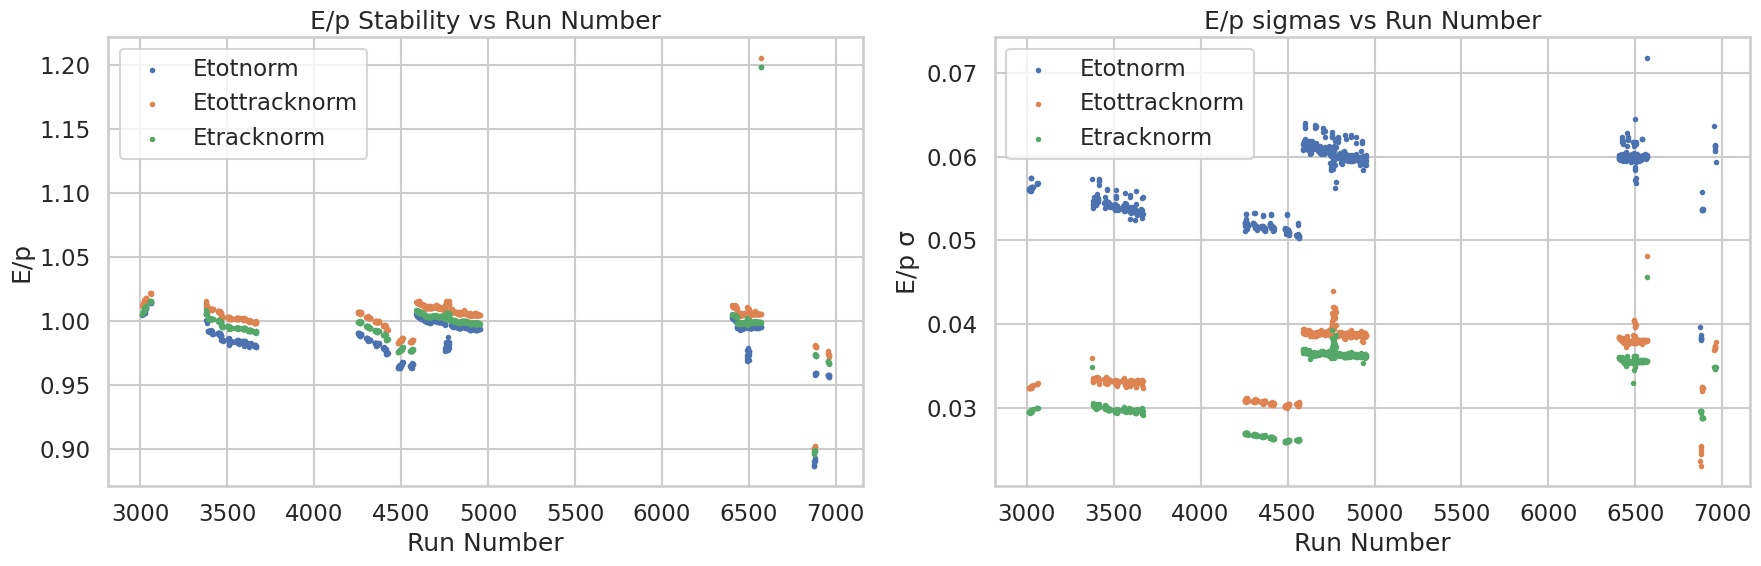

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load Data ===
df = pd.read_csv("/home/ubuntu/nps_analysis/pi0_analysis/E_P_stability.csv")

# === Style Setup ===
sns.set(style="whitegrid", context="talk", palette="deep")
plt.rcParams["figure.figsize"] = (10, 6)

# === Variables to Plot ===
variables = [
    ("Etotnorm_Peak", "Etotnorm_Sigma", "Etotnorm"),
    ("Etottracknorm_Peak", "Etottracknorm_Sigma", "Etottracknorm"),
    ("Etracknorm_Peak", "Etracknorm_Sigma", "Etracknorm")
]

# # === 1. Individual Plots ===
# for var, err, label in variables:
#     plt.figure()
#     # plt.errorbar(df["Run"], df[var], yerr=df[err], fmt="o", capsize=1, label=label)
#     plt.scatter(df["Run"], df[var], marker='+', s=1)
#     plt.xlabel("Run Number")
#     plt.ylabel(label)
#     plt.ylim(0.95, 1.05)
#     plt.title(f"{label} vs Run Number")
#     plt.grid(True)
#     plt.tight_layout()
#     plt.savefig(f"{var}_vs_Run.png", dpi=300)
#     plt.show()

# # === 2. Combined Plot ===
# plt.figure(figsize=(12, 7))
# for var, err, label in variables:
#     # plt.errorbar(df["Run"], df[var], yerr=df[err], fmt="o", capsize=3, label=label, s=1)
#     plt.scatter(df["Run"], df[var], label=label, s=1)

# plt.xlabel("Run Number")
# plt.ylabel("E/p")
# # plt.ylim(0.95,1.05)
# plt.title("E/p Stability vs Run Number")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.savefig("Combined_Ep_Stability.png", dpi=300)
# plt.show()

# # === 2. Combined Plot ===
# plt.figure(figsize=(12, 7))
# for var, err, label in variables:
#     plt.scatter(df["Run"], df[err], label=label, s=1)

# plt.xlabel("Run Number")
# plt.ylabel("E/p sigma")
# # plt.ylim(0.95,1.05)
# plt.title("E/p sigmas vs Run Number")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.savefig("Combined_Ep_Stability_sigma.png", dpi=300)
# plt.show()

# === Combined Subplots ===
fig, axs = plt.subplots(1, 2, figsize=(18, 6), sharex=True)

# --- E/p Plot ---
for var, err, label in variables:
    axs[0].scatter(df["Run"], df[var], label=label, s=6)
axs[0].set_xlabel("Run Number")
axs[0].set_ylabel("E/p")
axs[0].set_title("E/p Stability vs Run Number")
axs[0].legend()
axs[0].grid(True)

# --- E/p Sigma Plot ---
for var, err, label in variables:
    axs[1].scatter(df["Run"], df[err], label=label, s=6)
axs[1].set_xlabel("Run Number")
axs[1].set_ylabel("E/p σ")
axs[1].set_title("E/p sigmas vs Run Number")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.savefig("E_p_Stability_Subplots.png", dpi=300)
plt.show()


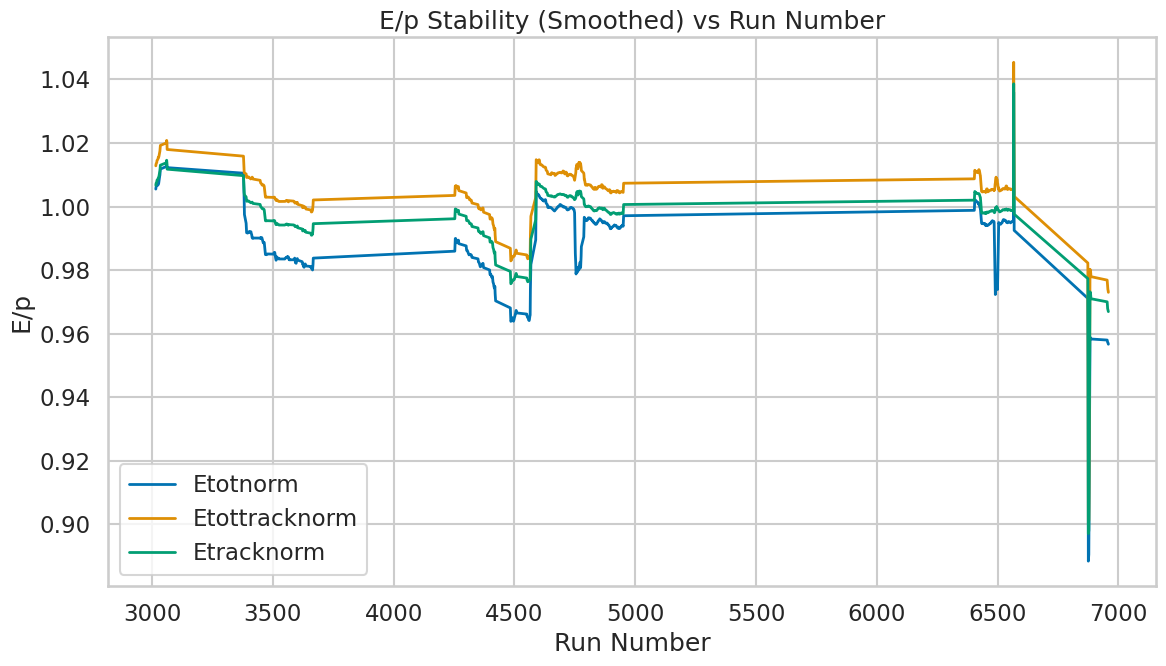

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load Data ===
df = pd.read_csv("/home/ubuntu/nps_analysis/pi0_analysis/E_P_stability.csv")
df = df.sort_values("Run")  # ensure sorted runs

# === Plot Style ===
sns.set(style="whitegrid", context="talk", palette="colorblind")
plt.rcParams["figure.figsize"] = (10, 6)

# === Variables to Plot ===
variables = [
    ("Etotnorm_Peak", "Etotnorm_Sigma", "Etotnorm"),
    ("Etottracknorm_Peak", "Etottracknorm_Sigma", "Etottracknorm"),
    ("Etracknorm_Peak", "Etracknorm_Sigma", "Etracknorm")
]

# === Rolling Average Window Size ===
window = 5

# # === 1. Individual Plots with Smoothing and Error Bars ===
# for var, err, label in variables:
#     plt.figure()
    
#     # Raw points (transparent and small)
#     plt.errorbar(df["Run"], df[var], yerr=df[err], fmt='o', markersize=3, alpha=0.4, capsize=3, label="Raw")
    
#     # Rolling average
#     smooth = df[var].rolling(window=window, center=True).mean()
#     plt.plot(df["Run"], smooth, label=f"Rolling Avg (w={window})", color='black', linewidth=2)

#     plt.xlabel("Run Number")
#     plt.ylabel(label)
#     plt.title(f"{label} vs Run Number")
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
#     plt.savefig(f"{var}_vs_Run_smooth.png", dpi=300)
#     plt.show()

# === 2. Combined Plot (Smoothed only) ===
plt.figure(figsize=(12, 7))

colors = ["C0", "C1", "C2"]
for i, (var, err, label) in enumerate(variables):
    smooth = df[var].rolling(window=window, center=True).mean()
    plt.plot(df["Run"], smooth, label=label, linewidth=2, color=colors[i])

plt.xlabel("Run Number")
plt.ylabel("E/p")
plt.title("E/p Stability (Smoothed) vs Run Number")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Combined_Ep_Stability_Smoothed.png", dpi=300)
plt.show()


In [6]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# === Load Data ===
df = pd.read_csv("/home/ubuntu/nps_analysis/pi0_analysis/E_P_stability.csv")

# === Variables to Plot ===
variables = [
    ("Etotnorm_Peak", "Etotnorm_Sigma", "Etotnorm"),
    ("Etottracknorm_Peak", "Etottracknorm_Sigma", "Etottracknorm"),
    ("Etracknorm_Peak", "Etracknorm_Sigma", "Etracknorm")
]

# === 1. Individual Interactive Scatter Plots ===
for var, err, label in variables:
    fig = px.scatter(
        df,
        x="Run",
        y=var,
        error_y=err,
        title=f"{label} vs Run Number",
        labels={"Run": "Run Number", var: label},
    )
    fig.update_traces(marker=dict(symbol="cross", size=6))
    fig.update_yaxes(range=[0.95, 1.05])
    fig.update_layout(
        template="plotly_white",
        height=500,
        width=900
    )
    fig.show()

# === 2. Combined Interactive Plot ===
fig_combined = go.Figure()

for var, err, label in variables:
    fig_combined.add_trace(
        go.Scatter(
            x=df["Run"],
            y=df[var],
            error_y=dict(type='data', array=df[err], visible=True),
            mode='markers',
            name=label,
            marker=dict(size=6, symbol="cross")
        )
    )

fig_combined.update_layout(
    title="E/p Stability vs Run Number",
    xaxis_title="Run Number",
    yaxis_title="E/p",
    template="plotly_white",
    height=600,
    width=1000,
    yaxis=dict(range=[0.95, 1.05])
)

fig_combined.show()
